In [1]:
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# --------------------------------------------------
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants = power_plants.drop(columns='Unnamed: 0') # Drop first column

# Import states data
fp = os.path.join('data', 'tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)
states.columns = states.columns.str.lower()

# --------------------------------------------------
# Create geometry column for power plants
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

# Convert power plants DataFrame to GeoDataFrame
power_plants = gpd.GeoDataFrame(power_plants,      # Data
                                geometry=points,   # Specify geometry column
                                crs='EPSG:4269'    # Specify CRS
                                )

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


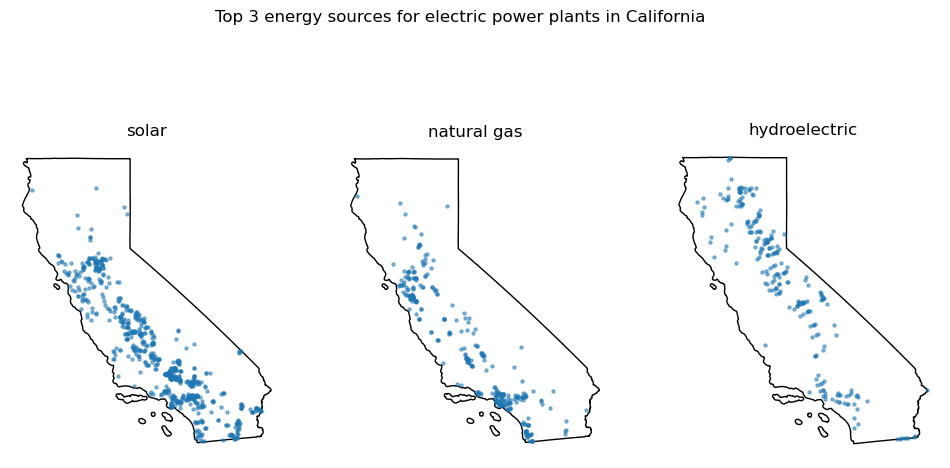

In [2]:
# Last week we solved this exercise 


# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = ['solar', 'natural gas', 'hydroelectric']

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Steps to create a function

Recommended steps:

1. Solve the problem for a specific example
2. Identify which parts of the code need to be generalized and update these parts 
3. Wrap this into a function
4. Add additional parameters or assert statementss
5. Test function
6. Add a docstring

Example: we want to obtain the top 3 power sources for any state programatically as a function

### Step 1: solve for specific example

Example: Solve for CA

In [3]:
state_power_plants = power_plants[power_plants['state'] == 'California']
top_sources = (state_power_plants['primsource']
              .value_counts()
              .index[:3]
              .tolist())

top_sources

['solar', 'natural gas', 'hydroelectric']

### Step 2: Identify parts of the code that need to be generalized

In [4]:
state = 'California'

state_power_plants = power_plants[power_plants['state'] ==state] # generalize state
top_sources = (state_power_plants['primsource']
              .value_counts()
              .index[:3]
              .tolist())

top_sources

['solar', 'natural gas', 'hydroelectric']

### Step 3: Define the function

In [5]:
def top3_sources(state, power_plants):
    state_power_plants = power_plants[power_plants['state'] == state]
    top_sources = (state_power_plants['primsource']
              .value_counts()
              .index[:3]
              .tolist())
    return top_sources

top_sources

['solar', 'natural gas', 'hydroelectric']

In [6]:
top3_sources('Oregon', power_plants)

['solar', 'hydroelectric', 'wind']

Generally we do not want to assume something exists outside the function, we want the function to contain everything or be able to produce everything it needs in order to run

## Example

Create a function that will produce a plot given a list of primary sources and a state name

### Step 1: Write out basic way to solve the problem

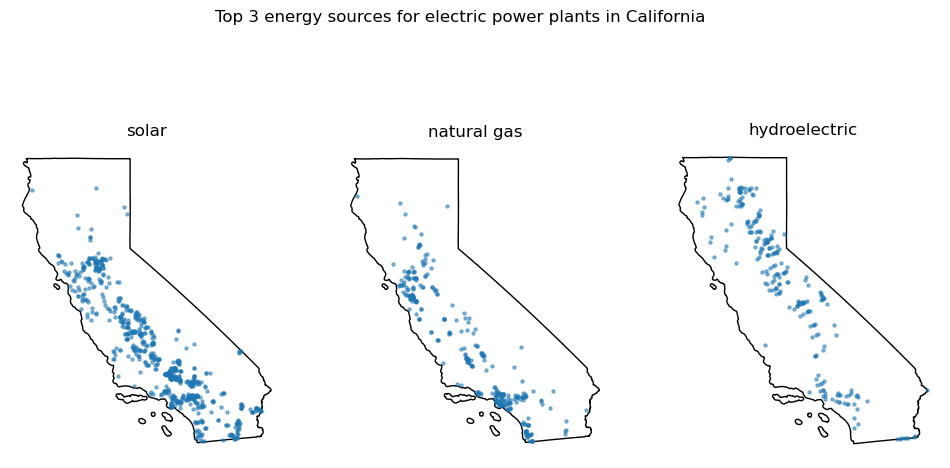

In [7]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = top3_sources("California", power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()


### Step 2: Which steps of the code need to be generalized:
Anything where CA is used specifically.

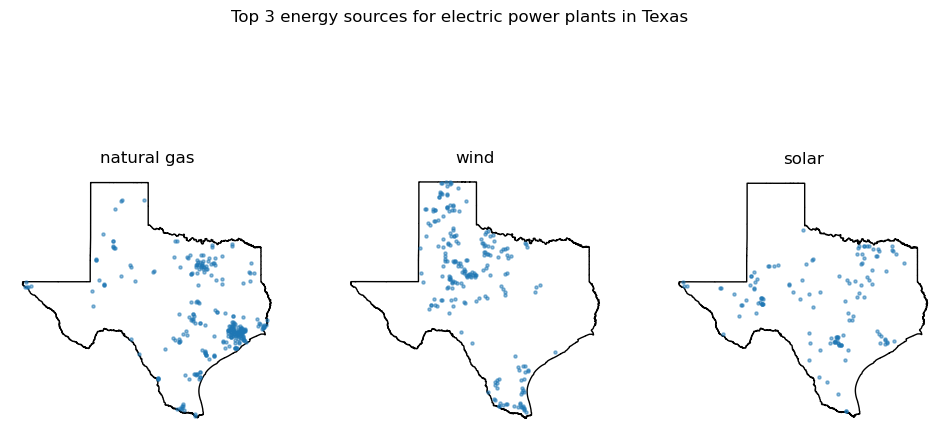

In [8]:
# Select CA power plants and boundary
state = "Texas"
# Select CA power plants and boundary
state_power_plants = power_plants[power_plants['state'] == state]
state_boundary = states[states['name'] == state]

# CA top 3 power sources were previously given
state_top_sources = top3_sources(state, power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    state_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = state_power_plants[state_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
plt.show()

In [9]:
def plot_top3_power_sources(state):
    # Select CA power plants and boundary
    #state = "Texas"
    # Select CA power plants and boundary
    state_power_plants = power_plants[power_plants['state'] == state]
    state_boundary = states[states['name'] == state]

    # CA top 3 power sources were previously given
    state_top_sources = top3_sources(state, power_plants)

    # Create subplots for each top source in a single figure
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
    for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources

        axis.set_title(source)
        axis.axis('off')

        state_boundary.plot(ax=axis,
                        color='none')
        
        # Subset power plants by source and plot
        source_subset = state_power_plants[state_power_plants['primsource'] == source]
        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
    plt.show()

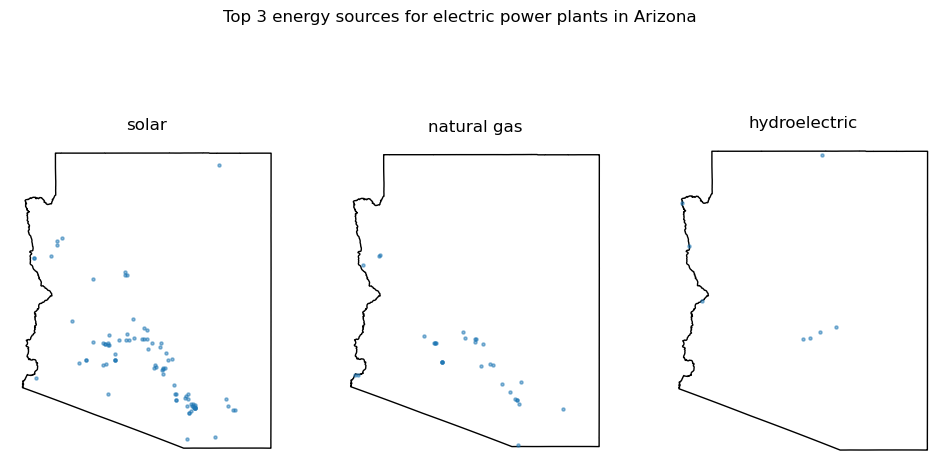

In [10]:
plot_top3_power_sources("Arizona")

### Exercise 1

Create a function called power_source_counts, that given a power source returns a Series with the counts of power plants by state that use that source 

Follow these steps:
1. solve the problem with a specific example 
2. identify which parts of the code need to be generalized and update them
3. wrap into function
4. add additional parameters or assert statements if needed

In [39]:
# Solve problem for specific example

power_plants[power_plants['primsource'] == 'wind'].value_counts('state')

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
Idaho              32
New York           32
New Mexico         29
Pennsylvania       26
Wyoming            25
Washington         23
South Dakota       23
Ohio               22
Massachusetts      20
Maine              20
Indiana            20
Montana            19
Rhode Island       19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
Vermont             5
Utah                5
New Hampshire       5
Maryland            5
Alaska              4
Puerto Rico         2
Tennessee           2
New Jersey          2
North Carolina      1
Nevada              1
Virginia            1
Delaware            1
Connecticut         1
Name: count, dtype: int64

In [43]:
# Step 2: identify what needs to be generalized 
source = 'wind'

top_states = power_plants[power_plants['primsource'] == source].value_counts('state')

top_states

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
Idaho              32
New York           32
New Mexico         29
Pennsylvania       26
Wyoming            25
Washington         23
South Dakota       23
Ohio               22
Massachusetts      20
Maine              20
Indiana            20
Montana            19
Rhode Island       19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
Vermont             5
Utah                5
New Hampshire       5
Maryland            5
Alaska              4
Puerto Rico         2
Tennessee           2
New Jersey          2
North Carolina      1
Nevada              1
Virginia            1
Delaware            1
Connecticut         1
Name: count, dtype: int64

In [49]:
# Step 3 & 4: Wrap into function, add parameters

def power_source_counts(source, power_plants):
    top_states = power_plants[power_plants.primsource == source].value_counts('state')
    return top_states



In [51]:
# Test function we created
power_source_counts('nuclear', power_plants)

state
Illinois          6
Pennsylvania      4
South Carolina    4
New York          3
North Carolina    3
Louisiana         2
Ohio              2
Minnesota         2
Michigan          2
Alabama           2
New Jersey        2
Georgia           2
Florida           2
Texas             2
Virginia          2
Tennessee         2
Washington        1
Missouri          1
New Hampshire     1
Nebraska          1
Arizona           1
Mississippi       1
Maryland          1
Kansas            1
Connecticut       1
California        1
Arkansas          1
Wisconsin         1
Name: count, dtype: int64